<a href="https://colab.research.google.com/github/maiarenan/tp2-ML-dcc-ufmg-2024/blob/main/TP2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
game_data = fetch_ucirepo(id=101)

game_data.data.head()
# # data (as pandas dataframes)
# X = game_data.data.features
# y = game_data.data.targets

# # metadata
# print(game_data.metadata)

# # variable information
# print(game_data.variables)


TypeError: 'NoneType' object is not callable

In [ ]:
# prompt: replace values from y, 'positive' = 1, 'negative' = 0

import pandas as pd
from sklearn.impute import SimpleImputer as Imputer


# Replace 'positive' and 'negative' values with 1 and 0
# Convert the target variable to numeric values
y = y.replace({'positive': 1, 'negative': 0})
X = X.replace({'x': 1, 'o':0})

features = X
labels = y

features = Imputer().fit_transform(features)

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'b'

(958, 1)

# Ensemble: Decision tree + Adaptive Boosting

In [ ]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics, tree
from sklearn.preprocessing import OneHotEncoder
import numpy as np




In [ ]:
def weights(X, y):
  N = len(y)
  w = np.ones(N) / N
  return w



In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
sample_weights = weights(X_train, y_train)
enc = OneHotEncoder()
X_train = enc.fit_transform(X_train)
X_test = enc.transform(X_test)
y_train = enc.fit_transform(y_train)
y_test = enc.transform(y_test)

tree_cls = tree.DecisionTreeClassifier(max_depth = 2)

tree_cls.fit(X_train.toarray(), y_train.toarray())

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['int', 'str']

In [ ]:
X_train.toarray()

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [ ]:
predicted_labels = tree_cls.predict(X_test.toarray())
cm = confusion_matrix(y_test.toarray(), predicted_labels)
print(cm)
accuracy = metrics.accuracy_score(y_test.toarray(), predicted_labels)
print(f"Acurácia: {accuracy}")

ValueError: multilabel-indicator is not supported

[Text(0.5, 0.8333333333333334, 'x[13] <= 0.5\ngini = 0.445\nsamples = 670\nvalue = [[446, 224]\n[224, 446]]'),
 Text(0.25, 0.5, 'x[1] <= 0.5\ngini = 0.352\nsamples = 430\nvalue = [[332, 98]\n[98, 332]]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.263\nsamples = 263\nvalue = [[222, 41]\n[41, 222]]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.45\nsamples = 167\nvalue = [[110, 57]\n[57, 110]]'),
 Text(0.75, 0.5, 'x[2] <= 0.5\ngini = 0.499\nsamples = 240\nvalue = [[114, 126]\n[126, 114]]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.464\nsamples = 126\nvalue = [[46, 80]\n[80, 46]]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.481\nsamples = 114\nvalue = [[68, 46]\n[46, 68]]')]

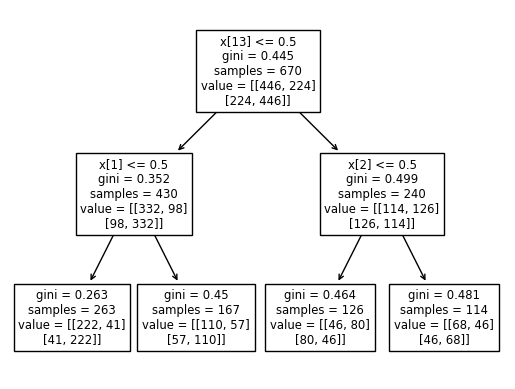

In [ ]:
tree.plot_tree(tree_cls.fit(X_train.toarray(), y_train.toarray()))

In [ ]:
# prompt: calculate errors of the classification

from sklearn.metrics import confusion_matrix

# Predict labels for the test set
predicted_labels = tree_cls.predict(X_test.toarray())

# Calculate and print the confusion matrix and accuracy score
cm = confusion_matrix(y_test.toarray(), predicted_labels)
print(cm)

accuracy = metrics.accuracy_score(y_test.toarray(), predicted_labels)
print(f"Accuracy: {accuracy}")

# Calculate and print the error rate
error_rate = 1 - accuracy
print(f"Error rate: {error_rate}")


ValueError: multilabel-indicator is not supported